# Teoría cuántica básica

## 0. importación de librerias

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import Operaciones_v11 as op
import math
from sympy import Matrix, pretty
from scipy import linalg 

## 1. Sistema de la posición de la partícula en una recta.

A continuación encontraremos la función posc, un vector, y despues muestra una gráfica con las probabilidades de encontrar la partícula en una posición x

*Puede ingresar los datos de forma manual o de forma predeterminada(directamente en el condigo)

Ingrese el Numero de vectores a ingresar (1 o 2) = 1
Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = 1
[0.025088, 0.04263199999999999, 0.18604999999999994, 0.25992049999999994, 0.09244999999999998, 0.0, 0.09244999999999998, 0.25992049999999994, 0.031249999999999997, 0.009940499999999998]


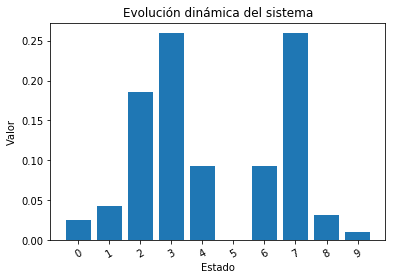

In [49]:
def main():
    No_vec = int(input("Ingrese el Numero de vectores a ingresar (1 o 2) = "))
    while No_vec not in [1, 2]:
        No_vec = int(input("Ingrese el Numero de vectores a ingresar (1 o 2) = "))
    if No_vec == 1:
        e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
        while e_vec not in [0, 1]:
            e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
        if e_vec == 0:
            vecN = int(input("Especifique el número de puntos posibles para el vector ket = "))
            vector = []
            for x in range(vecN):
                comp_1 = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + " = ")
                comp1 = op.vec(comp_1)
                vector.append([comp1])
            posc(vector)
        else:
            vector = [[[2, -1]],[[-1.5, 2.5]],[[-3.5, 5]],[[-4, 6]],[[-3.5, 2.5]],[[0, 0]],[[-3.5, 2.5]],[[6, -4]],[[0, 2.5]],[[-1, 1]]]
            posc(vector)
    else:
        e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
        while e_vec not in [0, 1]:
            e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
        if e_vec == 0:
            vecN1 = int(input("Especifique el número de puntos posibles para el vector ket 1 = "))
            vec1 = []
            for x in range(vecN1):
                comp_1 = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + " = ")
                comp1 = op.vec(comp_1)
                vec1.append([comp1])
            
            vecN2 = int(input("Especifique el número de puntos posibles para el vector ket 2 = "))
            vec2 = []
            for x in range(vecN2):
                comp_2 = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + " = ")
                comp2 = op.vec(comp_2)
                vec2.append([comp2])
        else:
            vec1 = [[[9, -7]],[[-3, 4]],]
            vec2 = [[[1, 0]],[[0, 0]],]

def posc(vector):
    vector = op.mult_cM([1,0], vector)
    prb = [[0]*1 for fila in range(len(vector))]
    for i in range(len(vector)):
        prb[i] = op.modul(vector[i][0])**2 / op.norma(vector)**2 
    #prb = np.round(prb, 3)
    labels = []
    estado = []
    No = 0
    print(prb)
    for i in range(len(prb)):
        labels.append(str(No))
        estado.append(prb[No])
        No += 1
    index = np.arange(len(labels))
    plt.bar(index, estado)
    plt.xlabel('Estado')
    plt.ylabel('Valor')
    plt.xticks(index, labels, rotation=30)
    plt.title('Evolución dinámica del sistema')
    plt.show()

def vectv(vec1, vec2):
    amplitud_tr = op.producto_interno(vec2, vec1)
    print('Amplitud de transición de vector 1 a vector 2:', amplitud_tr)

main()

## 2. Valores propios del observable y probabilidad 

A continuación encontraremos la función obsr, la cual recibe un vector, una matriz y una matriz identidad, y despues muestra: 
1. Valor esperado de Omega con respecto al estado psi
2. Varianza de Omega con respecto al estado psi

*Puede ingresar los datos de forma manual o de forma predeterminada(directamente en el condigo)

In [86]:
def main1():
    e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
    while e_vec not in [0, 1]:
        e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
    if e_vec == 0:
        vecN = int(input("Especifique el tamaño del observable = "))
        vec0 = []
        for x in range(vecN):
            comp_1 = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + " = ")
            comp1 = op.vec(comp_1)
            vec0.append([comp1])
            
        Matriz_1 = []
        No_filas_1 = int(input("Ingrese el número de filas del observable = "))
        No_columnas_1 = int(input("Ingrese el número de columnas del observable = "))
        for x in range(No_filas_1):
            Matriz_1.append([])
            for y in range(No_columnas_1):
                comp = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + str(y + 1) + " = ")
                comp1 = op.vec(comp)
                Matriz_1[x].append(comp1)
            
    else:
        vec0 = [[[-2, 1]],
 [[1, 0]],
 [[0,-1]],
 [[3,2]]
]
        Matriz_1 = [[[0,0],[0,-1/2],[0,-1],[-7/2,0]],
 [[0,1/2],[0,0],[7/2,0],[0,-1]],
 [[0,1],[7/2,0],[0,0],[0,-1/2]],
 [[-7/2,0],[0,1],[0,1/2],[0,0]]
]
    I = []
    for x in range(len(Matriz_1)):
        I.append([])
        for y in range(len(Matriz_1[0])):
            if x == y:
                I[x].append([1,0])
            else:
                I[x].append([0,0])
    obsr(vec0, Matriz_1, I)
        
def obsr(vec0, Matriz_1, I):
    vec0 = op.mult_cM([1/op.norma(vec0),0], vec0)
    VE = op.producto_interno(op.producto_de_matrices(Matriz_1, vec0) ,vec0)
    print('Valor esperado de Omega con respecto al estado psi:', round(VE[0],4))
    Delta = op.sumaM(Matriz_1, op.mult_cM([-1*VE[0],0], I))

    DeltaC = op.producto_de_matrices(Delta, Delta)
    Var = op.producto_interno(op.producto_de_matrices(DeltaC, vec0) ,vec0)
    print('Varianza de Omega con respecto al estado psi:', Var[0])



main1()            
        

Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = 1
Valor esperado de Omega con respecto al estado psi: 1.9
Varianza de Omega con respecto al estado psi: 13.09


# 3. Dinámica del sistema

A continuación encontraremos la función vec_val, la cual recibe una matriz y un vector, y despues muestra, los valores y vectores propios de la matriz, ademas de la probabilidad de que el vector inicial colapse a los diferentes vectores propios de la matriz  

*Puede ingresar los datos de forma manual o de forma predeterminada(directamente en el condigo)

In [112]:
def main2():
    e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
    while e_vec not in [0, 1]:
        e_vec = int(input("Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = "))
    if e_vec == 0:
        vecN = int(input("Especifique el tamaño del observable = "))
        vec0 = []
        for x in range(vecN):
            comp_1 = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + " = ")
            comp1 = op.vec(comp_1)
            vec0.append([comp1])
            
        Matriz_1 = []
        No_filas_1 = int(input("Ingrese el número de filas del observable = "))
        No_columnas_1 = int(input("Ingrese el número de columnas del observable = "))
        for x in range(No_filas_1):
            Matriz_1.append([])
            for y in range(No_columnas_1):
                comp = input("Ingrese el valor para la posición (en forma de número real o complejo) " + str(x + 1) + str(y + 1) + " = ")
                comp1 = op.vec(comp)
                Matriz_1[x].append(comp1)
            
    else:
        Matriz_1 = [[[0,0],[0,-1/2],[0,-1],[-7/2,0]],
 [[0,1/2],[0,0],[7/2,0],[0,-1]],
 [[0,1],[7/2,0],[0,0],[0,-1/2]],
 [[-7/2,0],[0,1],[0,1/2],[0,0]]
]
    vec0 = [[[-2, 1]],
 [[1, 0]],
 [[0,-1]],
 [[3,2]]
]
    new = []
    for x in range(len(Matriz_1)):
        new.append([])
        for y in range(len(Matriz_1[0])):
            new[x].append(0)
        
    for i in range(len(Matriz_1)):
        for k in range(len(Matriz_1[0])):
            if Matriz_1[i][k][1] != 0:
                new[i][k] = complex(Matriz_1[i][k][0],Matriz_1[i][k][1])
            else:
                new[i][k] = Matriz_1[i][k][0]
    
            
        
    
    vec_val(new, vec0)

def conv_t(lista):
    L = []
    for g in range(len(lista)):
        L.append(str(lista[g]))
    nl = []
    for i in range(len(L)):
        if "I" in L[i]:
            nl.append([[0,float(L[i][:-2])]])
        else:
            nl.append([[float(L[i]), 0]])
    return nl
def vec_val(new, vec0):
    vp = np.linalg.eigh(new)[0]
    print("")
    print("valores propios = ", vp)
    N = Matrix(new)
    print("")
    print("vectores propios v1: ")
    print("")
    print("")
    #print(N.eigenvects())
    print(pretty(N.eigenvects(), num_columns=132))
    L = N.eigenvects()
    ln = []
    for i in range(len(L)):
        ln.append(L[i][2][0])
    final = []
    for v in range(len(ln)):
        final.append(conv_t(ln[v]))
    print("")
    for y in range(len(final)):
        vec0 = op.mult_cM([1/op.norma(vec0),0],vec0)
        final[y] = op.mult_cM([1/op.norma(final[y]),0],final[y])
        amplitud_tr = op.producto_interno(vec0, final[y])
        r = op.modul(amplitud_tr)**2
        print("Probabilidad de colapsar de vector 1 a vector " + str(y+1) + " : ", round(r, 2))
        

        
        
    
main2()

Elija el metodo de ingresar los vectores (Manual = 0, Predeterminadas = 1) = 1

valores propios =  [-4. -3.  2.  5.]

vectores propios v1: 


⎡⎛         ⎡⎡ 1.0  ⎤⎤⎞  ⎛         ⎡⎡ 1.0  ⎤⎤⎞  ⎛        ⎡⎡-1.0 ⎤⎤⎞  ⎛        ⎡⎡ -1.0 ⎤⎤⎞⎤
⎢⎜         ⎢⎢      ⎥⎥⎟  ⎜         ⎢⎢      ⎥⎥⎟  ⎜        ⎢⎢     ⎥⎥⎟  ⎜        ⎢⎢      ⎥⎥⎟⎥
⎢⎜         ⎢⎢1.0⋅ⅈ ⎥⎥⎟  ⎜         ⎢⎢-1.0⋅ⅈ⎥⎥⎟  ⎜        ⎢⎢1.0⋅ⅈ⎥⎥⎟  ⎜        ⎢⎢-1.0⋅ⅈ⎥⎥⎟⎥
⎢⎜-4.0, 1, ⎢⎢      ⎥⎥⎟, ⎜-3.0, 1, ⎢⎢      ⎥⎥⎟, ⎜2.0, 1, ⎢⎢     ⎥⎥⎟, ⎜5.0, 1, ⎢⎢      ⎥⎥⎟⎥
⎢⎜         ⎢⎢-1.0⋅ⅈ⎥⎥⎟  ⎜         ⎢⎢1.0⋅ⅈ ⎥⎥⎟  ⎜        ⎢⎢1.0⋅ⅈ⎥⎥⎟  ⎜        ⎢⎢-1.0⋅ⅈ⎥⎥⎟⎥
⎢⎜         ⎢⎢      ⎥⎥⎟  ⎜         ⎢⎢      ⎥⎥⎟  ⎜        ⎢⎢     ⎥⎥⎟  ⎜        ⎢⎢      ⎥⎥⎟⎥
⎣⎝         ⎣⎣ 1.0  ⎦⎦⎠  ⎝         ⎣⎣ 1.0  ⎦⎦⎠  ⎝        ⎣⎣ 1.0 ⎦⎦⎠  ⎝        ⎣⎣ 1.0  ⎦⎦⎠⎦

Probabilidad de colapsar de vector 1 a vector 1 :  0.1
Probabilidad de colapsar de vector 1 a vector 2 :  0.2
Probabilidad de colapsar de vector 1 a vector 3 :  0.2
Probabilidad de colapsar de vector 1 a vector 4 :  0.5
